### **Walmart Retail Analysis and Sales Prediction**

---

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images.pexels.com/photos/1051747/pexels-photo-1051747.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260")


### **Problem Statement**

> *One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.*  
*Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.*

### **Overview**  

*This Graded Porject is part of the Simplilearn Masters Program on Data Science and Business Analytics where I was presented with Walmart Retail stores historical data for exploratory data analysis popularly known as `EDA` and finally build a predictive model to forecast demands for a particular store in absence of historical data or such unexpected scenarios.*  

>*We will be answering key business questions from stakeholders and narrate our findings through statistical figures and asthetic visuals. Finally we will build our models and find out which one fits on the data based on various explanatory variables.*  

### **Dataset Description**

*We are presented with a historical data that covers sales from 2010-02-05 to 2012-11-01.  
Within the file we will find the following fields:*

* *Store - the store number*

* *Date - the week of sales*

* *Weekly_Sales -  sales for the given store*

* *Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week*

* *Temperature - Temperature on the day of sale*

* *Fuel_Price - Cost of fuel in the region*

* *CPI – Prevailing consumer price index*

* *Unemployment - Prevailing unemployment rate*



### **Load and Process Data**  

*Our first and foremost step will be to load the dataset `which in my case happens to be uploaded in my google drive` - Since I will be using Google colab for this project.*

In [1]:
# importing all the required libraries
import os
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_object_dtype


In [2]:
import os
# mounting my personal drive
os.chdir("/Users/asur18/Downloads/")

# an object for prinitng the output
pp = pprint.PrettyPrinter(indent=4)

In [4]:
# load the csv file in a dataframe with the help of pandas
walmart_data =pd.read_csv('Walmart_Store_sales.csv')

#view first 5 rows of the created dataframe in its existing structure
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# print the shape of our dataset
pp.pprint('The Walmart Retail dataset has {} rows spread across {} columns'.format(walmart_data.shape[0],walmart_data.shape[1]))

'The Walmart Retail dataset has 6435 rows spread across 8 columns'


### **Missing data and its impact**  

*Missing data present various problems.* 
* *the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false.*  

* *the lost data can cause bias in the estimation of parameters.*  

* *it can reduce the representativeness of the samples.*  

* *it may complicate the analysis of the study.*  

*Thus to prevent such kind of distortion we need to compute if dataset conatins any `NaN` values and we need to impute them by various techniques if the first question turns to be `True`.*

In [387]:
# check for Missing values and Duplicate data
i=0
while i < len(walmart_data.columns):
  pp.pprint('The [{}] column has [{}] null values.'.format(walmart_data.isnull().sum().index[i],walmart_data.isnull().sum().values[i]))
  i+=1
print('\n')

'The [Store] column has [0] null values.'
'The [Date] column has [0] null values.'
'The [Weekly_Sales] column has [0] null values.'
'The [Holiday_Flag] column has [0] null values.'
'The [Temperature] column has [0] null values.'
'The [Fuel_Price] column has [0] null values.'
'The [CPI] column has [0] null values.'
'The [Unemployment] column has [0] null values.'




In [388]:
# check for duplicate data
pp.pprint('The Walmart Retail dataset has {} duplciate rows'.format(walmart_data.duplicated().sum()))


'The Walmart Retail dataset has 0 duplciate rows'


In [389]:
# describe the dataset
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


* **Key Points to be noted:**  

  * *On an apparent level we can understand one thing from here that the column `weekly sales` has few highly skewed data points observing the `mean` and `median` values.*   
  * *We will also observe the data distribution for `CPI` in latter part of our analysis.*

In [390]:
# we will furhter process the data
# taking help of lambda function to wrangle the Date column to extract Year and Month
walmart_data['Year']= walmart_data['Date'].apply(lambda x:x[-4:])
walmart_data['Month']= walmart_data['Date'].apply(lambda x:x[3:5])
walmart_data['Day']= walmart_data['Date'].apply(lambda x:x[0:2])

## **Exploratory Data Analysis and Data Visualization**

* ### *Basic Statistical tasks* 


* ####  (Q1)Which store has maximum sales?

'Store Id 20 has the maximum sales of 301397792.5 units'




Text(0, 0.5, 'Total Unit of Sales')

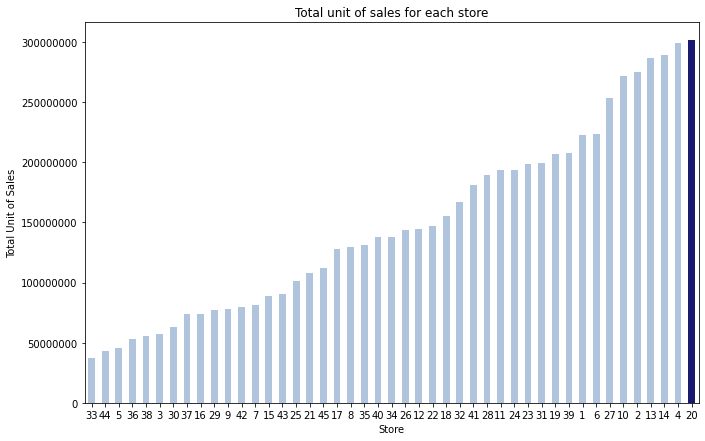

In [391]:
# Store with max weekly sales
store_with_max_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values()
pp.pprint('Store Id {} has the maximum sales of {} units'.format(store_with_max_sales.idxmax(),round(store_with_max_sales.max(),1)))
print('\n')

# plot the figure
plt.figure(figsize=(11,7))
clrs = ['midnightblue'if x==store_with_max_sales.max() else 'lightsteelblue'for x in store_with_max_sales]
fig1 = store_with_max_sales.plot(kind='bar',color = clrs)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total unit of sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Unit of Sales')



* **Findings**  

  * *Store Id 20 has performed the best among the 45 stores with the maximum sales of 301397792.5 units.*  
  * *Store Id 33 has the poorest performance aggregating data from 2010,2011,2021.*  


--- 



* #### (Q2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?

*The standard deviation of a dataset is a way to measure how far the average value lies from the mean.*

*we can use the following formula:*  
`s = √(Σ(xi – x)2 / (n-1))`  
`Σ: A symbol that means “sum”` 
`xi: The value of the ith observation in the sample`  
`x: The mean of the sample`  
`n: The sample size`  

*The higher the value for the standard deviation, the more spread out the values are in a sample. However, it’s hard to say if a given value for a standard deviation is **high** or **low** because it depends on the type of data we’re working with. Therefore, one way to understand whether or not a certain value for the standard deviation is high or low is to find the coefficient of variation also known as `coefficient of mean to standard deviation` and calculated using the formaula:*  
` CV = s / x`  
`s: The sample standard deviation`  
`x: The sample mean`  

**One key aspect to keep in mind - Closer the CV to 0, there is less variation in data and better to train our model.**

('Store id 14 is observed to have the maximum Standard Deviation of 317569.9 '
 'in repect of weekly sales')




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Weekly_Sales')

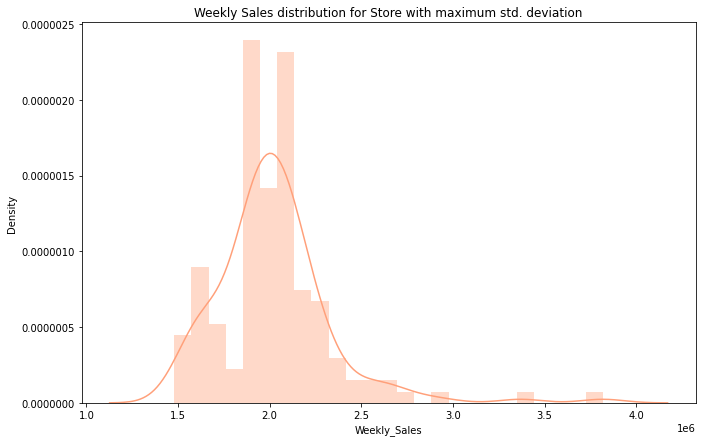

In [392]:
# aggregating the Weekly Sales from each store to find maximum standard deviation in data
plt.figure(figsize=(11,7))
data_std = walmart_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
pp.pprint('Store id {} is observed to have the maximum Standard Deviation of {} in repect of weekly sales'.format(data_std.idxmax(),round(data_std.max(),1)))
print('\n')

# plotting the distribution of data with maximum std. deviation
sns.distplot(walmart_data[walmart_data['Store'] == data_std.idxmax()]['Weekly_Sales'],color='lightsalmon')
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Weekly Sales distribution for Store with maximum std. deviation')
plt.xlabel('Weekly_Sales')



In [393]:
coef_mean_std = walmart_data.groupby('Store')['Weekly_Sales'].std() / walmart_data.groupby('Store')['Weekly_Sales'].mean()

# finding the coefficient of mean to standard deviation for each Store Id 
for i in coef_mean_std.index:
  pp.pprint('The coefficient of variation for Store Id {} is {}'
  .format(coef_mean_std.sort_index(ascending=True).index[i-1],round(coef_mean_std.sort_index(ascending=True).values[i-1],3)))

'The coefficient of variation for Store Id 1 is 0.1'
'The coefficient of variation for Store Id 2 is 0.123'
'The coefficient of variation for Store Id 3 is 0.115'
'The coefficient of variation for Store Id 4 is 0.127'
'The coefficient of variation for Store Id 5 is 0.119'
'The coefficient of variation for Store Id 6 is 0.136'
'The coefficient of variation for Store Id 7 is 0.197'
'The coefficient of variation for Store Id 8 is 0.117'
'The coefficient of variation for Store Id 9 is 0.127'
'The coefficient of variation for Store Id 10 is 0.159'
'The coefficient of variation for Store Id 11 is 0.122'
'The coefficient of variation for Store Id 12 is 0.138'
'The coefficient of variation for Store Id 13 is 0.133'
'The coefficient of variation for Store Id 14 is 0.157'
'The coefficient of variation for Store Id 15 is 0.193'
'The coefficient of variation for Store Id 16 is 0.165'
'The coefficient of variation for Store Id 17 is 0.126'
'The coefficient of variation for Store Id 18 is 0.163'
'Th

('Store id 35 is observed to have maxiumum coefficient of variation of 0.23 in '
 'repect of weekly sales')




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Weekly_Sales')

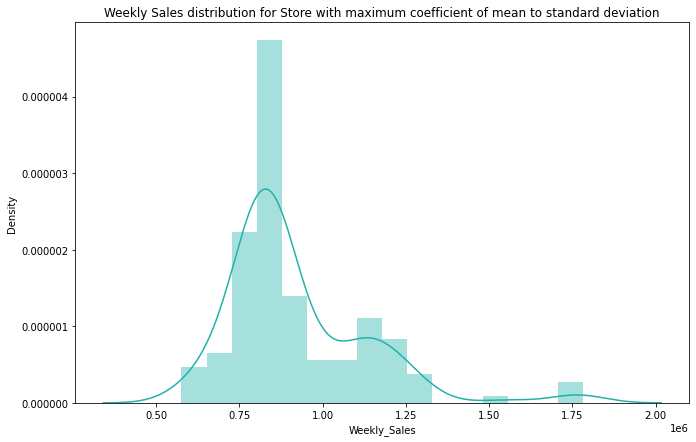

In [394]:
# find which store has the maxiumum coefficient of mean to standard deviation
plt.figure(figsize=(11,7))
pp.pprint('Store id {} is observed to have maxiumum coefficient of variation of {} in repect of weekly sales'.format(coef_mean_std.idxmax(),round(coef_mean_std.max(),3)))
print('\n')
sns.distplot(walmart_data[walmart_data['Store'] == coef_mean_std.idxmax()]['Weekly_Sales'],color='lightseagreen')
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Weekly Sales distribution for Store with maximum coefficient of mean to standard deviation')
plt.xlabel('Weekly_Sales')

* **Findings:**  
  * *Weekly Sales data in Store Id 14 have the maximum Standard Deviation of 317569.9 i.e. the data is more spread out.*  
  * *On the contrary, while comparing the variations between different stores data we found store Id 35 has the maximum CV of 0.23 in repect of weekly sales.*  
  
---




* #### (Q3) Which store/s has good quarterly growth rate in Q3’2012?

In [395]:
# Aggregating all stores data based on Years and extracting the data from 2012 only
data_2012 = walmart_data.groupby('Year').get_group('2012')
data_2012_month = data_2012.groupby('Month')

# Aggregating Growth for Q2
Q2_04 = data_2012_month.get_group('04')
Q2_05 = data_2012_month.get_group('05')
Q2_06 = data_2012_month.get_group('06')
Q2 = Q2_04.append(Q2_05)
Q2 = Q2.append(Q2_06)

# Aggregating Growth for Q3
Q3_07 = data_2012_month.get_group('07')
Q3_08 = data_2012_month.get_group('08')
Q3_09 = data_2012_month.get_group('09')
Q3 = Q3_07.append(Q3_08)
Q3 = Q3.append(Q3_09)

       Weekly_Sales
Store              
7         13.330776
16         8.488378
35         4.466637
26         3.955478
39         2.478404
41         2.456980
44         2.434638
24         1.652088
40         1.142841
23         0.825395


Text(0, 0.5, 'Sales_growth_rate')

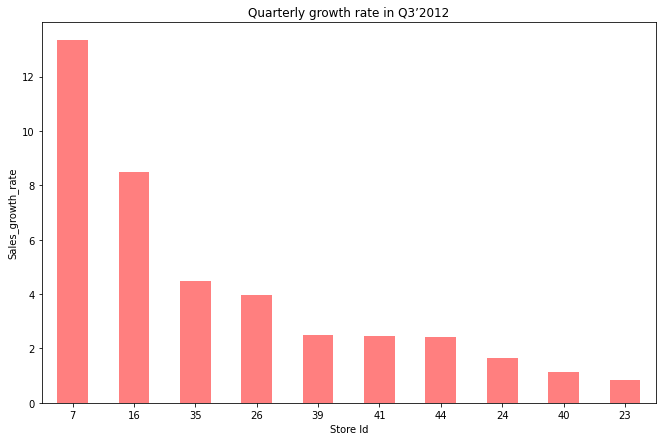

In [396]:
# Finding top 10 stores with maximum Growth rate in Q3 comapred to Q2
plt.figure(figsize=(11,7))
quaterly_growth = ((Q3.groupby('Store')['Weekly_Sales'].sum() - Q2.groupby('Store')['Weekly_Sales'].sum())/(
    Q2.groupby('Store')['Weekly_Sales'].sum())*100).sort_values(ascending=False).head(10)
print(pd.DataFrame(quaterly_growth))

#Plotting the Quaterly Growth rate 
quaterly_growth.plot(kind='bar',color = 'r',alpha=0.5)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Quarterly growth rate in Q3’2012')
plt.xlabel("Store Id")
plt.ylabel('Sales_growth_rate')

'Store Id 4 has recorded the maximum Sales for Q2 of 28454363.67'
'Store Id 4 has recorded the maximum Sales for Q3 of 27796792.46'




Text(0, 0.5, 'Sales_growth')

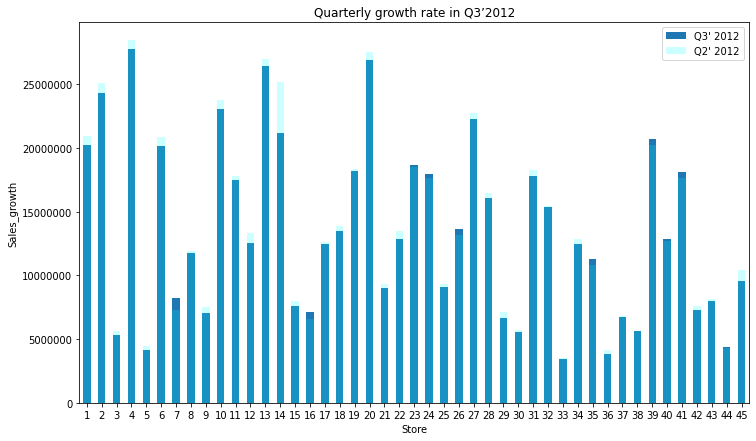

In [397]:
# Finding the maximum Total Sales achieved in both quater by a single store
pp.pprint('Store Id {} has recorded the maximum Sales for Q2 of {}'.format(Q2.groupby('Store')['Weekly_Sales'].sum().idxmax(),Q2.groupby('Store')['Weekly_Sales'].sum().max()))
pp.pprint('Store Id {} has recorded the maximum Sales for Q3 of {}'.format(Q3.groupby('Store')['Weekly_Sales'].sum().idxmax(),Q3.groupby('Store')['Weekly_Sales'].sum().max()))
print('\n')
plt.figure(figsize=(12,7))
Q2.groupby('Store')['Weekly_Sales'].sum().plot(
    ax=Q3.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar',legend=True),kind='bar',color ='cyan',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Quarterly growth rate in Q3’2012')
plt.xlabel('Store')
plt.ylabel('Sales_growth')

* **Findings:**  
  
  *   *Store `4` has marked the highest Quaterly Sales in both `Q2` and `Q3`, But Rate of quaterly growth has decresed in Q3 compared to that of Q2.*
  *   *Store Id such as `7`,`16`,`35`,`26`,`39`,`41`,`44`,`24`,`40`,`23` are the top 10 stores that has marked a significant `Growth Rate` in `Q3` compared to `Q2`.*  
  *  *Store Id `7` has achieved thr highest rate of Quaterly Growth - `13.33%` during `Q3`.*  

---


* #### (Q4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

*To begin with we are already provided with the list of holidays and the associated event for each of them, find the list below:*

```Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
```

In [398]:
#converting 'Date' column to Standard datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], dayfirst = True)

# Creating 5 separate dataframe for each particular holiday type and the mean weekly sales 
super_bowl = ['super_bowl',walmart_data[walmart_data['Date'].isin(['2010-02-12','2011-02-11','2012-02-10','2013-02-08'])]['Weekly_Sales'].mean()]
labour_day = ['labour_day',walmart_data[walmart_data['Date'].isin(['2010-09-10','2011-09-09','2012-09-07'])]['Weekly_Sales'].mean()]
thanksgiving = ['thanksgiving',walmart_data[walmart_data['Date'].isin(['2010-11-26','2011-11-25','2012-11-23'])]['Weekly_Sales'].mean()]
christmas = ['christmas',walmart_data[walmart_data['Date'].isin(['2010-12-31','2011-12-30','2012-12-28'])]['Weekly_Sales'].mean()]
non_holidays=['non_holidays',walmart_data[walmart_data.Holiday_Flag==0]['Weekly_Sales'].mean()]

In [399]:
# storing the resultset in a dataframe 
holiday_non_holiday_weekly_sales= pd.DataFrame(
    [super_bowl,labour_day,thanksgiving,christmas,non_holidays],columns=('Events','Avg_Sales')).sort_values(by='Avg_Sales',ascending=False)
holiday_non_holiday_weekly_sales

,Events,Avg_Sales
2,thanksgiving,1.471273e+06
0,super_bowl,1.079128e+06
1,labour_day,1.042427e+06
4,non_holidays,1.041256e+06
3,christmas,9.608331e+05


Text(0, 0.5, 'Sales_growth')

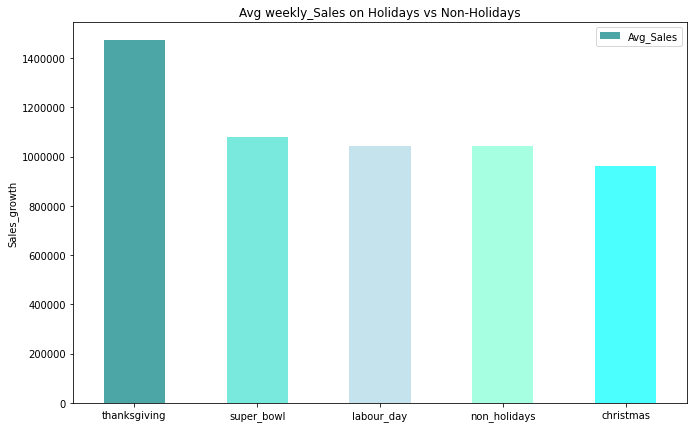

In [400]:
# plotting through a bar chart the maximum to minimum weekly sales during each holidays and non holiday
colors=['teal','turquoise','lightblue','aquamarine','aqua']
ax=holiday_non_holiday_weekly_sales.plot(kind='bar',figsize=(11,7),color=[colors],alpha=0.7)
ax.set_xticklabels(labels=holiday_non_holiday_weekly_sales.Events,rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Avg weekly_Sales on Holidays vs Non-Holidays')
plt.ylabel('Sales_growth')

* **Findings:**  
  * *From the `bar graph` it is clearly evident that `thanksgiving` day has observed the highest demand in sales followed by `Super Bowl`.* 
  * *we can also see `Christmas` has a negative impact on sales as per our historical data.* 
  * *`thanksgiving`,`super bowl` and `labour day` has higher sales than mean sales during non-holiday seasons.*  

---

* #### (Q5) Provide a monthly and semester view of sales in units and give insights

       Weekly_Sales
Month              
07     6.500010e+08
04     6.468598e+08
06     6.226299e+08
08     6.130902e+08
03     5.927859e+08
10     5.847848e+08
09     5.787612e+08
12     5.768386e+08
02     5.687279e+08
05     5.571256e+08
11     4.130157e+08
01     3.325984e+08


Text(0, 0.5, 'Total Sale')

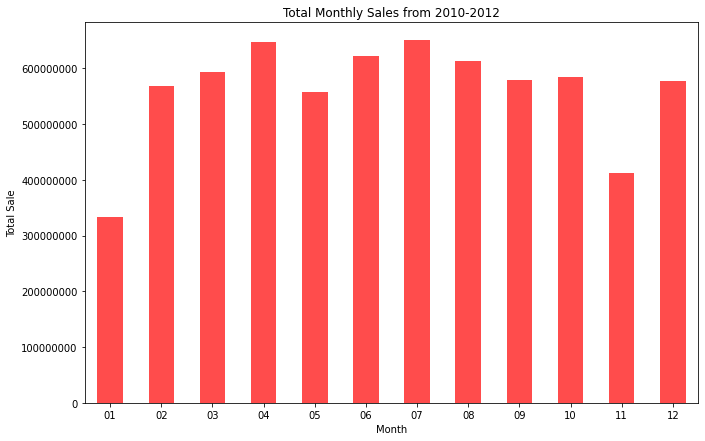

In [401]:
plt.figure(figsize=(11,7))
mon = walmart_data.groupby('Month')['Weekly_Sales'].sum()
print(pd.DataFrame(mon.sort_values(ascending=False)))

#plotting the analysis
mon.plot(kind='bar',color='r',alpha = 0.7)
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total Monthly Sales from 2010-2012')
plt.xlabel("Month")
plt.ylabel('Total Sale')

Text(0.5, 1.0, 'Monthly view of sales in 2012')

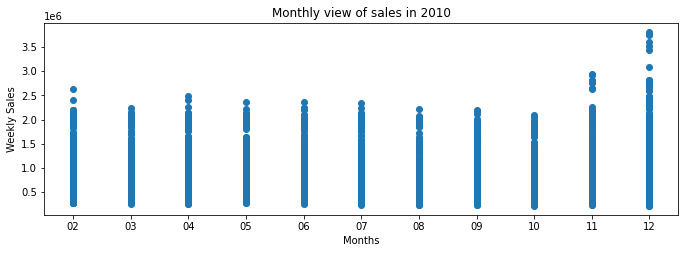

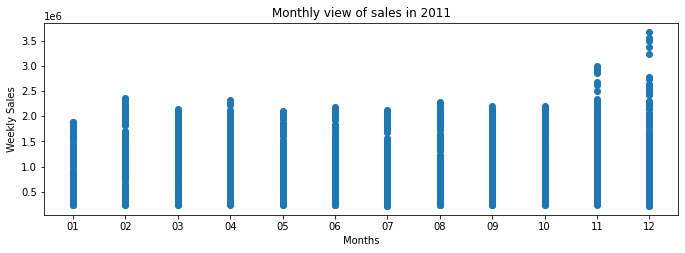

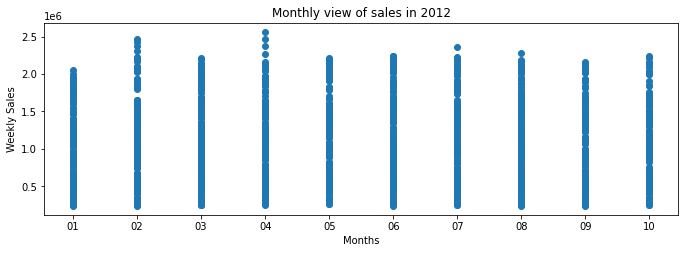

In [402]:
#Distributing the Total monthly Sales based on Year

# Total Sales distributed across months in 2010
plt.figure(figsize=(25,12))
plt.subplot(3,2,1)
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.scatter(walmart_data[walmart_data.Year=='2010']['Month'],walmart_data[walmart_data.Year=='2010']['Weekly_Sales'])


# Total Sales distributed across months in 2011
plt.figure(figsize=(25,12))
plt.subplot(3,2,2)
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.scatter(walmart_data[walmart_data.Year=='2011']['Month'],walmart_data[walmart_data.Year=='2011']['Weekly_Sales'])


# Total Sales distributed across months in 2012
plt.figure(figsize=(25,12))
plt.subplot(3,2,3)
plt.scatter(walmart_data[walmart_data.Year=='2012']['Month'],walmart_data[walmart_data.Year=='2012']['Weekly_Sales'])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")

... *We will further calculate the total sales according to the semester*  


Text(0, 0.5, 'Total Sales')

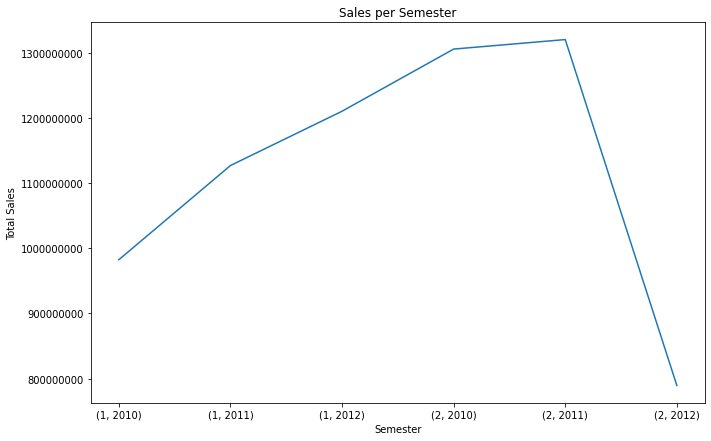

In [403]:
# Distributing Sales across Semesters 
plt.figure(figsize=(11,7))
walmart_data['semester']= [1 if int(i)<=6 else 2 for i in walmart_data['Month']]
sem = walmart_data.groupby(['semester','Year']).sum()
sem['Weekly_Sales'].sort_index().plot(kind='line')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Sales per Semester')
plt.xlabel("Semester")
plt.ylabel('Total Sales')

* **Findings:**  
  * *We found some interesting insights from our above analysis, while aggregating the monthly sales data we can see the month of `December` to mark maximum sales for `2010` and `2011` consiquetively. However there was no sales data available for December in `2012`.* 
  * *As as result, we can conclude the month of `July` to experience the maximum demand in sales.* 
  * *`July`,`April`,`June`,`August`,`March` are the top five months to observe the maximum demands through the year.* 
  * *Followed by them, `September` and `October` has also seen sales demand among customers.* 
  * *`January` and `November` are the lowest demadning months from the weekly sales perspective.* 
  * *While analysing the sales pattern grouped into semester, we can conclude from the line graph that **semester 1** shows a increasing demand in sales reaching the maximum during **semsester 2** in `2012` which since then plummeted down till the `December`.*  




*This concludes our Statistical tasks based on data analysis for this project, therefore we will move towards developing a predictive model to forecast sales for **Store 1** for which we have previously observed a coefficient of variation ~ `0.1` for `weekly Sales` which happens to be our target variable in the following part.*  





---



## **Statistical Model**

### **For Store 1 – Build  prediction models to forecast demand**

* *Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order).* 
* *Hypothesize if CPI, unemployment, and fuel price have any impact on sales.*
* *Change dates into days by creating new variable.*

**Select the model which gives best accuracy.**

In [404]:
# view the dataset
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   object        
 9   Month         6435 non-null   object        
 10  Day           6435 non-null   object        
 11  semester      6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 603.4+ KB


**Key Points to be noted:**  

* *`Weekly_Sales`,`Holiday_Flag`,`Temperature`,`Fuel_Price`,`CPI`,`Unemployemnt` are numerical variables.*
* *Our computed column `Year`,`Month` and `Day` are categorical variables as of now.*
* *No missing values among `6435` records.*

In [405]:
model_data = walmart_data[walmart_data.Store==1][['Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Year','Weekly_Sales']]

*...Utilize variables like date and restructure dates as 1 for 5 Feb 2010*

In [406]:
model_data.Date = model_data['Date'].index
model_data.Date+=1
model_data.head()

,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Weekly_Sales
0,1,0,42.31,2.572,211.096358,8.106,2010,1643690.90
1,2,1,38.51,2.548,211.242170,8.106,2010,1641957.44
2,3,0,39.93,2.514,211.289143,8.106,2010,1611968.17
3,4,0,46.63,2.561,211.319643,8.106,2010,1409727.59
4,5,0,46.50,2.625,211.350143,8.106,2010,1554806.68


#### 1. Univariate Analysis  
>*We will be performing Univariate Analysis mainly to look at the distrubution of data and to identify presence of (if) any outliers in the dataset.*

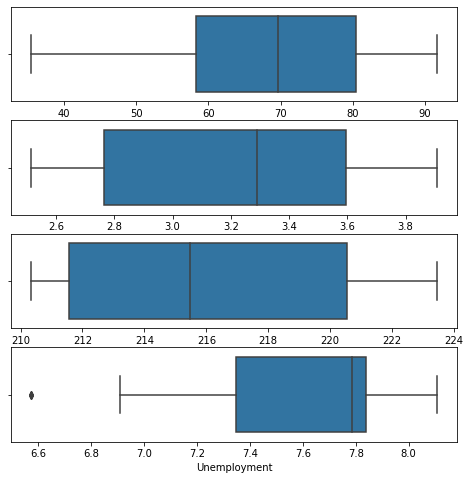

In [407]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(8,8))
X = model_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x=model_data[column], ax=axs[i])

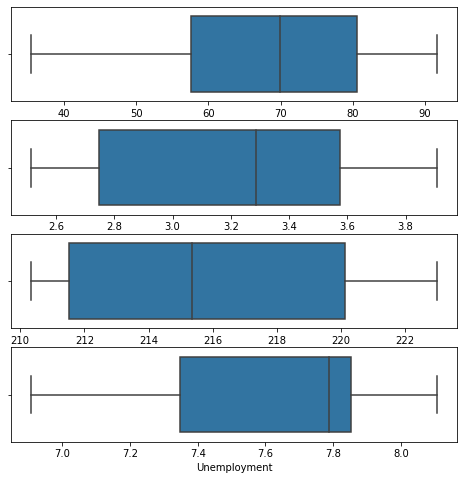

In [408]:
# Remove Outliers
model_data = model_data[(model_data['Unemployment']<10) & (model_data['Unemployment']>6.6)]
# check outliers 
fig, axs = plt.subplots(4,figsize=(8,8))
X = model_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x=model_data[column], ax=axs[i])

* Key Points to be noted:

  * *In our `walmart_dataset` we observed possible presence of outlier or skewed data in `Unemplyment` column.*
  * *For column `Weekly_Sales` we can safely conclude the presence of highly skewed data due to huge hike in weekly sales marked during the holiday events.*

*To strengthen our analysis, we have previously observed that for Store 1 the weekly sales data is highly spread with coeffienct variation of `0.1`.*

#### Multivariate Analysis  
      
*Our aim for performing multivariate analysis is to find patterns and correlations between several independent factors with our dependent variable `Weekly_Sales`, this  is known as `Depedence Method`.*

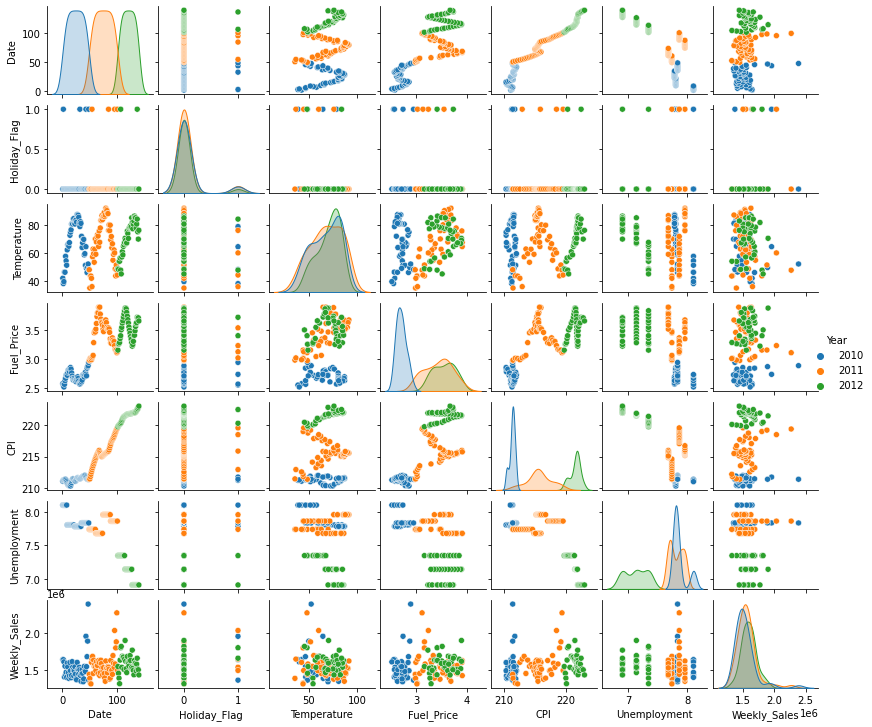

In [409]:
#one liner code for Scatter plot using seaborn visualization library
g=sns.pairplot(model_data,hue='Year')
g.fig.set_size_inches(12,10)

* Findings:  
  * *From the above graph we fail to find any linear relatioship between our features such as `Fuel_Price`, `CPI`, `Unemployment` etc and our predictor `Weekly_Sales`.*  
  * *However, interestingly the graph reveals some stats about linear relations among `CPI` and `Fuel_Price` with `Date`.*  
  * *we can further establish the existence of relation between `CPI` and `Fuel_Price`.*  





#### Hypothesis testing

##### **Pearson Correlation  Coefficient**

Correlation is a measure of how much the one variable is related to another. It is measured by a metric called as the `correlation coefficient`. 

The types of correlation can braodly classfied into three types:  
  1. Positive Correlation
  2. Negative Correlation
  3. No Correlation  

*therefore the value of the correlation co-efficient lies between -1 and 1.* 

*Since Pearson Correlation test only quatifies the strength of association between our dependent and independent variables we will also perform statistical hypothesis and with the help of `p-value` establish our `NULL` or `Alternate` Hypothesis.*



The Pearson Correlation Coefficient is 0.23434869447173204  with a P-value of P = 0.0054904101780622275


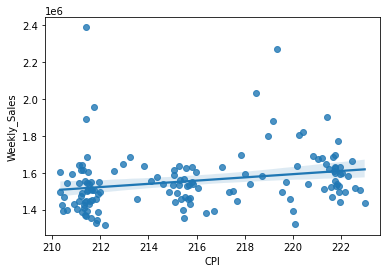

In [410]:
from scipy import stats
# correlation and pvalue test between weekly_sales and CPI
pearson_coef, p_value = stats.pearsonr(model_data['CPI'], model_data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#plotting with a regression scatter plot
h=sns.regplot(x="CPI", y="Weekly_Sales", data=model_data)


The Pearson Correlation Coefficient is -0.10717009979997633  with a P-value of P = 0.20921499290708317


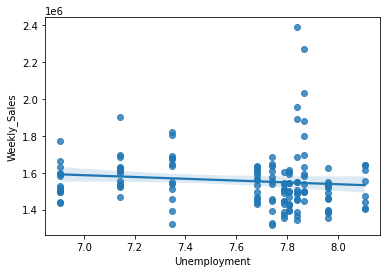

In [411]:
# correlation and pvalue test between weekly_sales and CPI
pearson_coef, p_value = stats.pearsonr(model_data['Unemployment'], model_data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#plotting with a regression scatter plot
sns.regplot(x="Unemployment", y="Weekly_Sales", data=model_data)

The Pearson Correlation Coefficient is 0.1243817294878271  with a P-value of P = 0.1446013860618373


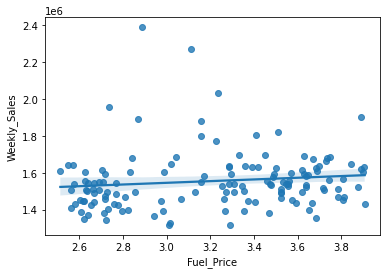

In [412]:
# correlation and pvalue test between weekly_sales and CPI
pearson_coef, p_value = stats.pearsonr(model_data['Fuel_Price'], model_data['Weekly_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#plotting with a regression scatter plot
sns.regplot(x="Fuel_Price", y="Weekly_Sales", data=model_data)

*... we can also calculate the correlation coefficient of indivual factors by using the pandas function corr()*

Text(0.5, 1.0, 'Correlation Matrix')

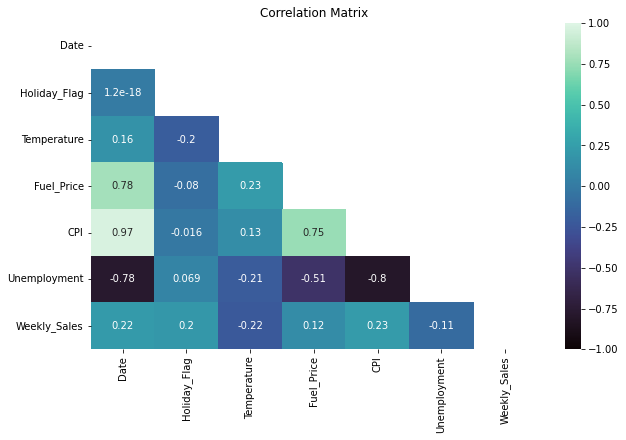

In [413]:
mask = np.triu(np.ones_like(model_data.corr(), dtype=bool))
plt.figure(figsize=(10,6))
corr=model_data.corr()
sns.heatmap(corr,cmap='mako',vmin=-1.0,vmax=1.0, annot=True,mask=mask)
plt.title('Correlation Matrix')

* **Key points to be noted:**
  * *for the variable `CPI` we observed an correlation coefficient of  ~  **0.234** and a p-value of ~ **0.005**.*
  * *While factors such as `Unemployment` has a negative correlation coefficient of ~ **-0.107** with `Weekly_Sales` and a p-value  ~ **0.209**.*
  * *We further observed a correlation coefficient of ~ **0.124** betweeen `Fuel_Price` and `Weekly_Sales` and a p-value of ~ **0.144**.*
  * *we found the maximum correlation coefficient between `CPI - Date` ~ **0.97** and between `CPI - Fuel_Price` ~ **0.75**.* 
  * *Finally temperature seems to have a negative correlation coefficient ~ **-0.22**.* 
  
  
* **Conclusion that can be drawn:**  
  * *We can assume there exist a negligible correlation **(H1)** with a montonic relationship between `CPI` and `Weekly_Sales` and with a p-value of **0.005 < 0.05** confirming that the correlation is not by coincidence and we can reject the **H0** hypothesis in favour of our alternative **H1** hypothesis.*
  * *we can see negative non-linear relationship between `Unemployment` and `weekly_Sales` with an extremely high p-value of **0.209 > 0.05** compels us to conculde that we fail to reject out **H0** hypothesis.*
  *   *Finally observing the horizontal regression line and coefficient of **0.124** compel us to say there exist no correlation between `Fuel_Price` and `Weekly_Sales`.*



In [414]:
#model_data = model_data.drop(['Year'],axis=True)
model_data.head()


,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Weekly_Sales
0,1,0,42.31,2.572,211.096358,8.106,2010,1643690.90
1,2,1,38.51,2.548,211.242170,8.106,2010,1641957.44
2,3,0,39.93,2.514,211.289143,8.106,2010,1611968.17
3,4,0,46.63,2.561,211.319643,8.106,2010,1409727.59
4,5,0,46.50,2.625,211.350143,8.106,2010,1554806.68


#### Scalling the dataset and train-test splitting

In [415]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

#Scalling the data
scaler=StandardScaler()
scaler.fit(model_data)
X=model_data.drop(['Weekly_Sales'],axis=1)
y=model_data['Weekly_Sales']

#splitting into train,test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)


#### Model Selection and Evaluating Model

**Linear regression**

Root Mean Squared Error(RMSE): 170513.85071158534
R Squared                    : 0.06674885056701207


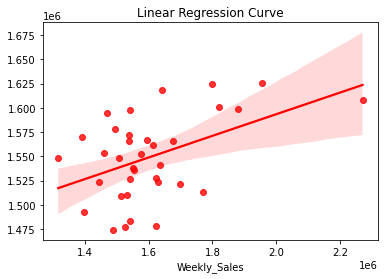

In [416]:
# Fit the Model
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
ln_y_pred=lin_reg.predict(X_test)

# Finding out the slope and the intercept
coef=lin_reg.coef_
intercept=lin_reg.intercept_

# Model evaluation
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ln_y_pred)))
print('R Squared                    :',r2_score(y_test,ln_y_pred))

#plotting the y_pred and y_test value
plt.title('Linear Regression Curve')
scat_plot=sns.regplot(x=y_test,y=ln_y_pred,color='r')

**RandomForestRegressor**

Root Mean Squared Error(RMSE): 180821.84596629944
R Squared                   : -0.0494965281306361


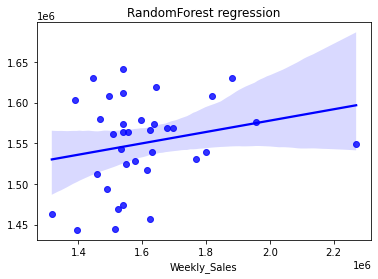

In [417]:
ran_reg=RandomForestRegressor()
ran_reg.fit(X_train,y_train)
rn_y_pred=ran_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, rn_y_pred)))
print('R Squared                   :',r2_score(y_test,rn_y_pred))

#plotting the y_pred and y_test values
plt.title('RandomForest regression')
scat_plot=sns.regplot(x=y_test,y=rn_y_pred,color='b')

**Lasso Regression**

Root Mean Squared Error(RMSE): 170541.60109594284
R Squared                   : 0.06644506075298473


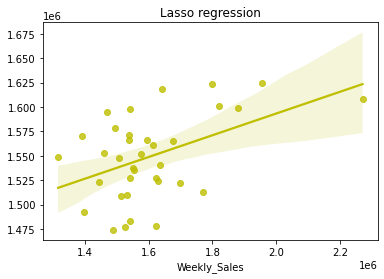

In [418]:
Lasso_reg=Lasso(normalize=True)
Lasso_reg.fit(X_train,y_train)
ls_y_pred=Lasso_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ls_y_pred)))
print('R Squared                   :',r2_score(y_test,ls_y_pred))

#plotting the y_pred and y_test values
plt.title('Lasso regression')
scat_plot=sns.regplot(x=y_test,y=ls_y_pred,color='y')

We will drop the attribute `Unemployment` which has a correlation coefficient **-0.11** and further showing no linear correlation.

In [419]:
model_data = model_data.drop(['Unemployment'],axis=True)
# Scalling the data
scaler=StandardScaler()
scaler.fit(model_data)
X=model_data.drop(['Weekly_Sales'],axis=1)
y=model_data['Weekly_Sales']

#splitting into train,test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

`Linear Regression`

Root Mean Squared Error(RMSE): 134971.32610669037
R Squared                    : -0.06096117459719186


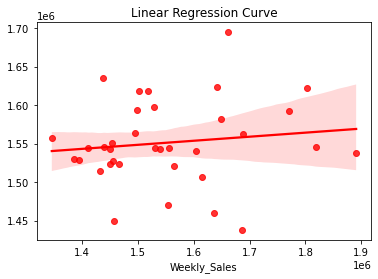

In [420]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
ln_y_pred=lin_reg.predict(X_test)

coef=lin_reg.coef_
intercept=lin_reg.intercept_
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ln_y_pred)))
print('R Squared                    :',r2_score(y_test,ln_y_pred))

#plotting the y_pred and y_test value
plt.title('Linear Regression Curve')
scat_plot=sns.regplot(x=y_test,y=ln_y_pred,color='r')

`RandomForest Regressor`

Root Mean Squared Error(RMSE): 101245.1770627537
R Squared                   : 0.4030126205626544


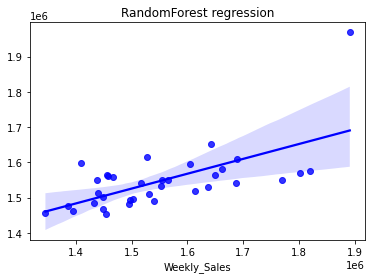

In [422]:
ran_reg=RandomForestRegressor()
ran_reg.fit(X_train,y_train)
rn_y_pred=ran_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, rn_y_pred)))
print('R Squared                   :',r2_score(y_test,rn_y_pred))

#plotting the y_pred and y_test values
plt.title('RandomForest regression')
scat_plot=sns.regplot(x=y_test,y=rn_y_pred,color='b')

`Lasso Regression`

Root Mean Squared Error(RMSE): 134947.88347783335
R Squared                   : -0.06059265841185768


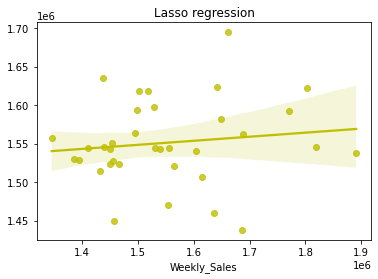

In [423]:
Lasso_reg=Lasso(normalize=True)
Lasso_reg.fit(X_train,y_train)
ls_y_pred=Lasso_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, ls_y_pred)))
print('R Squared                   :',r2_score(y_test,ls_y_pred))

#plotting the y_pred and y_test values
plt.title('Lasso regression')
scat_plot=sns.regplot(x=y_test,y=ls_y_pred,color='y')

* Key Points to be noted :  
  * *For Linear regression the best value of `RMSE`  and `R Squared` are **134971.32** and **-0.0609**.*
  * *For Lasso regression the best value of `RMSE` and `R Squared` are **134947.88** and **-0.0605**.*
  * *For Random Forest Regressor the best  value of `RMSE` and `R Squared` are **101245.17** and **0.4030**.*

*After dropping the column `Unemployment` we observed a significant improvement in our `RMSE` value for our models.*

*MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. RMSE is the square root of MSE. MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error.*  

*The RandomForest regressor model gives us the best accuracy of model with 40% of dependent variability can be explained by the model and a relatively lower margin of RMSE - **101245.17**.* 



## **Conclusion**  

*This conlcudes our Walmart Retail Analysis and Sales Prediction Project.* 

*Task Performed and decsions that could be taken from the above analysis:*  
 * *`Task - 1` - Store Id **20** has performed the best among the 45 stores with the maximum sales of **301397792.5 units**.*
 * *`Task - 2` - Store Id **14** have the maximum Standard Deviation of Weeeky Sales data, However store Id **35** has the maximum co-efficient of variance in repect of weekly sales.* 
 * *`Task - 3` - Store Id **7** has achieved thr highest rate of Quaterly Growth - **13.33%** during `Q3`.* 
 * *`Task - 4` - The two holiday to experience a huge demand in sales are **thanksgiving** followed by **Super Bowl**.* 
 * *`Task - 5` - we can conclude the month of **July** to experience the maximum demand in sales and can recommend the stores to purchase stocks accordingly to meet such high demands.* 

`Statistical Model`  
 * *We can assume there exist a negligible correlation **(H1)** with a montonic relationship between `CPI` and `Weekly_Sales` and with a p-value of **0.005 < 0.05** confirming that the correlation is not by coincidence and we can reject the **H0** hypothesis in favour of our alternative **H1** hypothesis.*
 * *we can see negative non-linear relationship between **Unemployment** and **weekly_Sales** with an extremely high p-value of **0.209 > 0.05** compels us to conculde that we fail to reject out **H0** hypothesis.*
 *  *Finally observing the horizontal regression line and coefficient of **0.124** enable us to say there exist no correlation between **Fuel_Price** and **Weekly_Sales**.*
 * *We fail to find any **Linear Relationship** between our dependent and response variable and therefore we cannot recommend a Linear Model to predict future Sales.* 

*However, We found **40%** accuracy with **RandomForest Regressor Model**, although with a RMSE of **101245.17** it is not a very reliable model.*  



---

